In [ ]:
#We gonna scrape IMDB reviews of GameOfThrones
#http://www.imdb.com/title/tt0944947/episodes url to scrape

In [35]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'
episodes = []
ratings = []
titles=[]
#Iterate over 1 to 7

for season in range(1,8):
    r=requests.get(url,params={'season':season})
    soup=BeautifulSoup(r.text,'html.parser')
    main=soup.find('div',class_='eplist')
    
    for epnr, div in enumerate(main.find_all('div', recursive=False)):
        episode = "{}.{}".format(season, epnr + 1)
        title=div.find('strong').find('a').get_text(strip='True')
        rating_el = div.find(class_='ipl-rating-star__rating')
        rating = float(rating_el.get_text(strip=True))
        print('Episode:', episode,'Title:',title, '-- rating:', rating)
        episodes.append(episode)
        ratings.append(rating)
        titles.append(title)

Episode: 1.1 Title: Winter Is Coming -- rating: 9.0
Episode: 1.2 Title: The Kingsroad -- rating: 8.8
Episode: 1.3 Title: Lord Snow -- rating: 8.7
Episode: 1.4 Title: Cripples, Bastards, and Broken Things -- rating: 8.8
Episode: 1.5 Title: The Wolf and the Lion -- rating: 9.1
Episode: 1.6 Title: A Golden Crown -- rating: 9.2
Episode: 1.7 Title: You Win or You Die -- rating: 9.3
Episode: 1.8 Title: The Pointy End -- rating: 9.1
Episode: 1.9 Title: Baelor -- rating: 9.6
Episode: 1.10 Title: Fire and Blood -- rating: 9.5
Episode: 2.1 Title: The North Remembers -- rating: 8.9
Episode: 2.2 Title: The Night Lands -- rating: 8.6
Episode: 2.3 Title: What Is Dead May Never Die -- rating: 8.9
Episode: 2.4 Title: Garden of Bones -- rating: 8.9
Episode: 2.5 Title: The Ghost of Harrenhal -- rating: 8.9
Episode: 2.6 Title: The Old Gods and the New -- rating: 9.1
Episode: 2.7 Title: A Man Without Honor -- rating: 9.0
Episode: 2.8 Title: The Prince of Winterfell -- rating: 8.9
Episode: 2.9 Title: Black

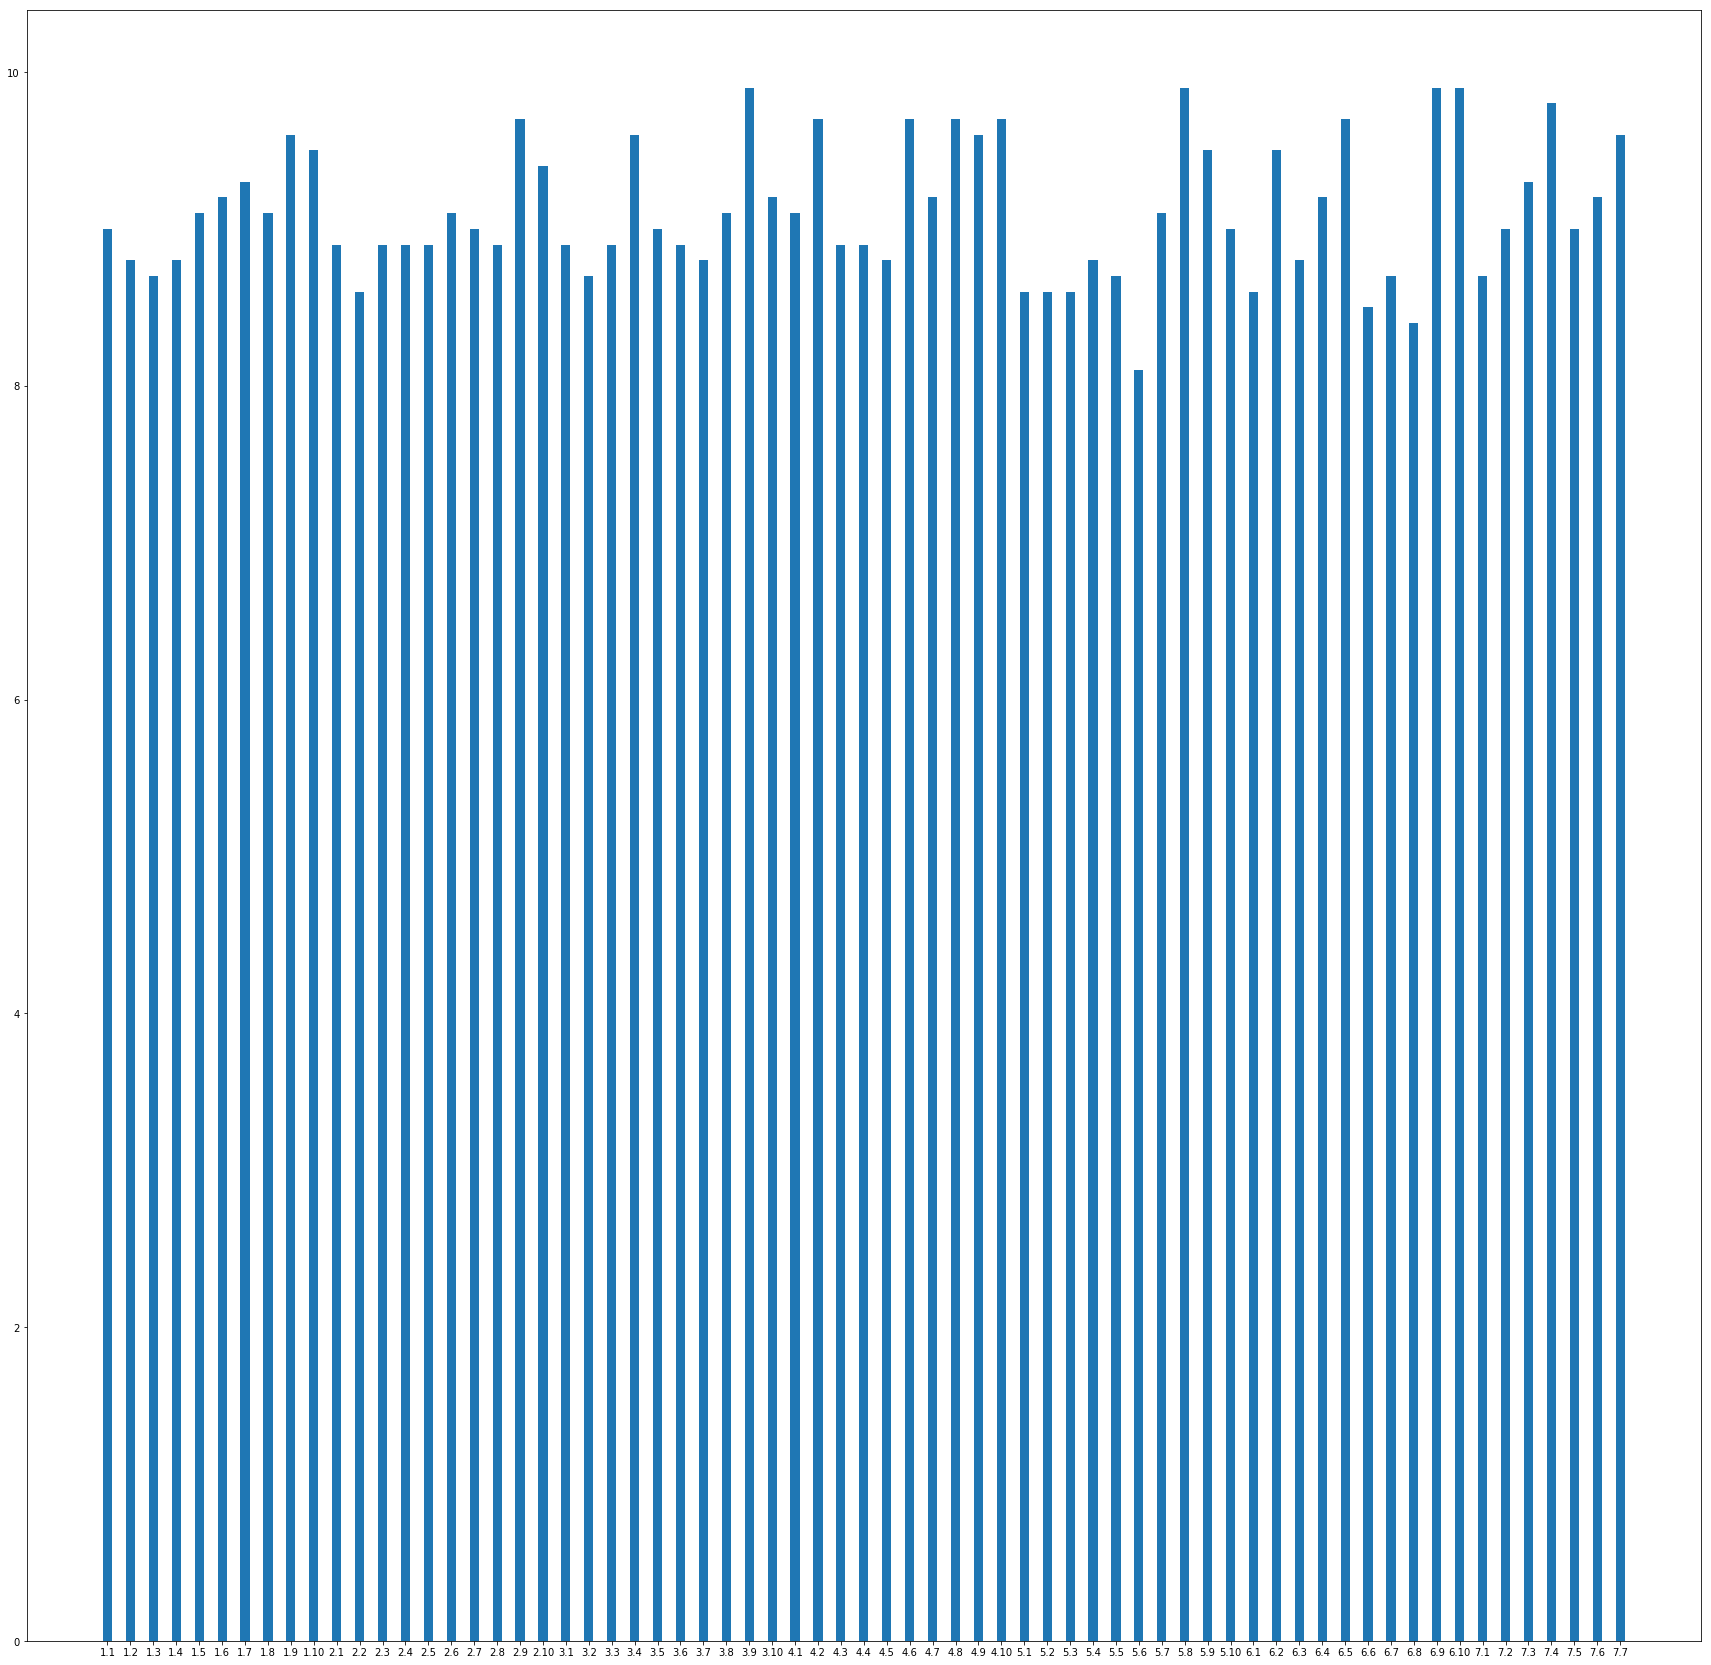

In [33]:
import matplotlib.pyplot as plt
episode = ['S' + e.split('.')[0] if int(e.split('.')[1]) == 1 else '' \
                                  for e in episodes]
plt.figure(figsize=(30,30))

positions = [a*2 for a in range(len(ratings))]
plt.bar(positions, ratings, align='center')
plt.xticks(positions, episodes)
plt.show()

In [34]:
import pandas as  pd


In [36]:
df=pd.DataFrame({'Episode':episodes,'Title':titles,'Rating':ratings})

In [38]:
df

,Episode,Title,Rating
0,1.1,Winter Is Coming,9.0
1,1.2,The Kingsroad,8.8
2,1.3,Lord Snow,8.7
3,1.4,"Cripples, Bastards, and Broken Things",8.8
4,1.5,The Wolf and the Lion,9.1
5,1.6,A Golden Crown,9.2
6,1.7,You Win or You Die,9.3
7,1.8,The Pointy End,9.1
8,1.9,Baelor,9.6
9,1.10,Fire and Blood,9.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5c4f7c390>]],
      dtype=object)

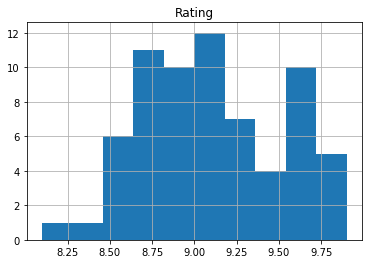

In [48]:
df.hist('Rating')

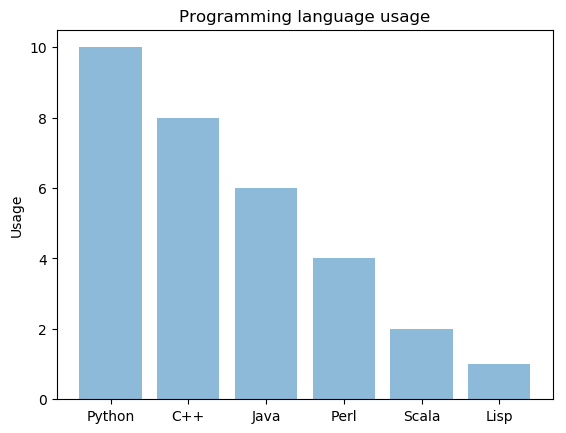

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()